***AUTHOR: EPHANTUS WANDUA***

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [2]:
#Import the data and inspect the top 5 and bottom 5 data in DataFrame
users = pd.read_csv('data\\dirty_users.csv', index_col=0)
users.head(5)

,id,age,gender,occupation,zip code
0,821,37.0,M,engineer,77845
1,212,49.0,NaN,educator,61401
2,504,40.0,F,writer,92115
3,275,38.0,NaN,engineer,92064
4,701,51.0,F,librarian,56321


In [3]:
#Check the bottom of dataframe
users.tail()

,id,age,gender,occupation,zip code
1032,187,26.0,M,educator,16801
1033,518,49.0,F,NaN,99709
1034,735,150.0,F,healthcare,85719
1035,483,NaN,M,scientist,43212
1036,269,31.0,F,librarian,43201


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037 entries, 0 to 1036
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1037 non-null   int64  
 1   age         926 non-null    float64
 2   gender      936 non-null    object 
 3   occupation  938 non-null    object 
 4   zip code    1037 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 48.6+ KB


In [5]:
users.isnull().sum()

id              0
age           111
gender        101
occupation     99
zip code        0
dtype: int64

> we have 111 missing vlaues in age, 101 missing values in gender and 99 missing values in occupation, we need to work on them to clean the data

In [6]:
users.describe()

,id,age
count,1037.000000,926.000000
mean,472.085824,34.847732
std,272.880253,20.595185
min,1.000000,-10.000000
25%,235.000000,24.000000
50%,473.000000,31.000000
75%,709.000000,43.000000
max,943.000000,150.000000


> the minimum age of -10, is unrealistics we need to clean it, also the maximum age of 150 might not be realistic we need to clean it

In [7]:
users.describe(include='O')

,gender,occupation,zip code
count,936,938,1037
unique,2,23,795
top,M,student,55414
freq,669,189,10


> in the occupation, the student need to be coded to match 

In [8]:
#investigate the occupation columns
users.occupation.unique()

array(['engineer', 'educator', 'writer', 'librarian', 'retired', nan,
       'executive', 'programmer', 'student', 'administrator', 'other',
       'scientist', 'technician', 'homemaker', 'healthcare', 'none',
       'entertainment', 'doctor', 'marketing', 'lawyer', 'artist',
       'salesman', 'marketing^R` ', 'studentT'], dtype=object)

> There is some unmatch entries for `marketing` and `student`

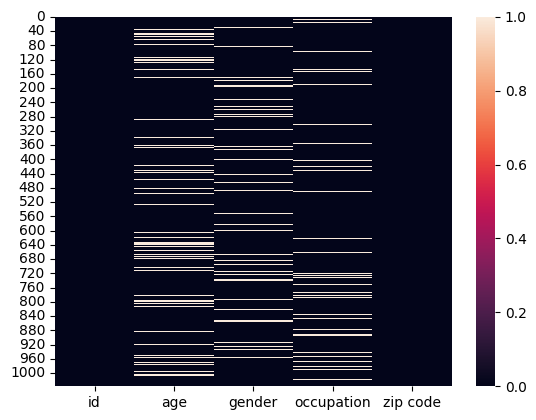

In [9]:
# visualize the missing value
sns.heatmap(users.isna());

In [10]:
# check for duplicated zip codes
users.duplicated('id')

0       False
1       False
2       False
3       False
4       False
        ...  
1032    False
1033    False
1034    False
1035     True
1036     True
Length: 1037, dtype: bool

In [11]:
#how many are duplicated
users.duplicated('id').sum()

np.int64(94)

In [12]:
users.duplicated('id').value_counts()

False    943
True      94
Name: count, dtype: int64

In [13]:
users['occupation'].value_counts()

occupation
student          189
other            105
educator          93
administrator     81
engineer          69
programmer        62
librarian         51
writer            48
executive         32
scientist         32
artist            31
marketing         26
technician        22
entertainment     18
healthcare        17
retired           15
lawyer            12
salesman          12
none               8
doctor             7
homemaker          6
marketing^R`       1
studentT           1
Name: count, dtype: int64

In [14]:
users.groupby('occupation')['age'].agg(['mean', 'count', 'median'])

,mean,count,median
occupation,,,
administrator,43.757143,70,40.0
artist,30.777778,27,30.0
doctor,43.714286,7,45.0
educator,42.253165,79,40.0
engineer,33.344262,61,35.0
entertainment,27.176471,17,24.0
executive,37.451613,31,38.0
healthcare,52.166667,12,47.5
homemaker,30.200000,5,26.0


> inconsistent occupation labels needs to be corrected using - string manipulation

In [15]:
users['age'].max()

np.float64(150.0)

In [16]:
users[users['age'] ==150.0]

,id,age,gender,occupation,zip code
66,780,150.0,M,programmer,94560
115,686,150.0,M,educator,26506
352,470,150.0,NaN,programmer,10021
468,830,150.0,M,programmer,53066
510,541,150.0,F,student,84302
520,259,150.0,M,student,48823
522,144,150.0,M,programmer,20910
543,726,150.0,F,administrator,80538
649,896,150.0,M,writer,91505
829,686,150.0,M,educator,26506


> sounds like there is so many outliers- we can confirm this with a graphical EDA

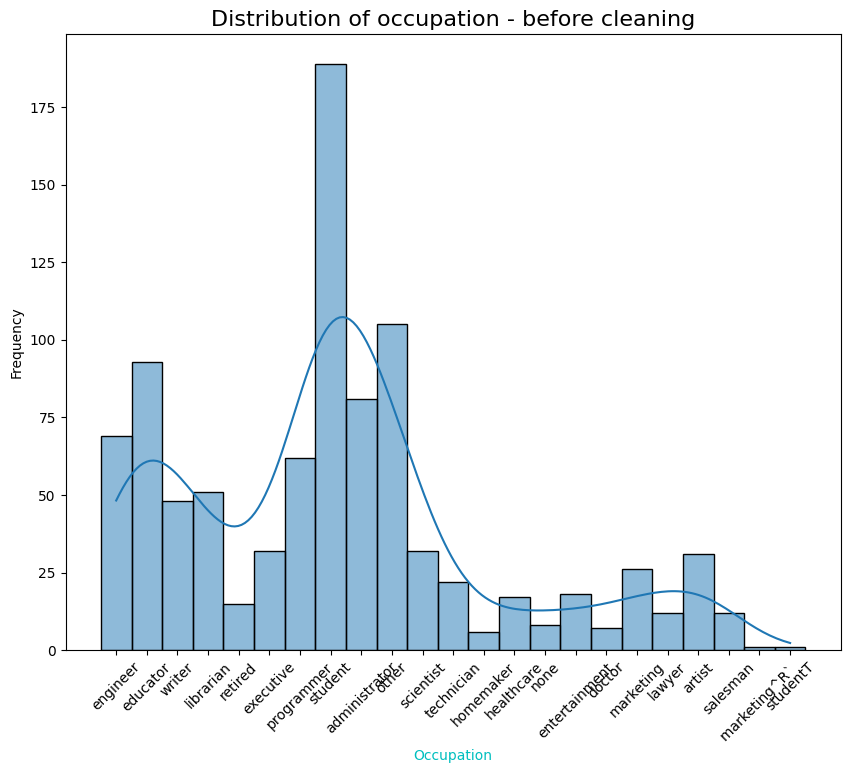

In [17]:
# Histogram to check the distribution
plt.figure(figsize=(10,8))
sns.histplot(data=users, x='occupation', bins=10, kde=True)
plt.title("Distribution of occupation - before cleaning", loc="center", fontsize=16, color='k')
plt.xlabel('Occupation', color='c')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

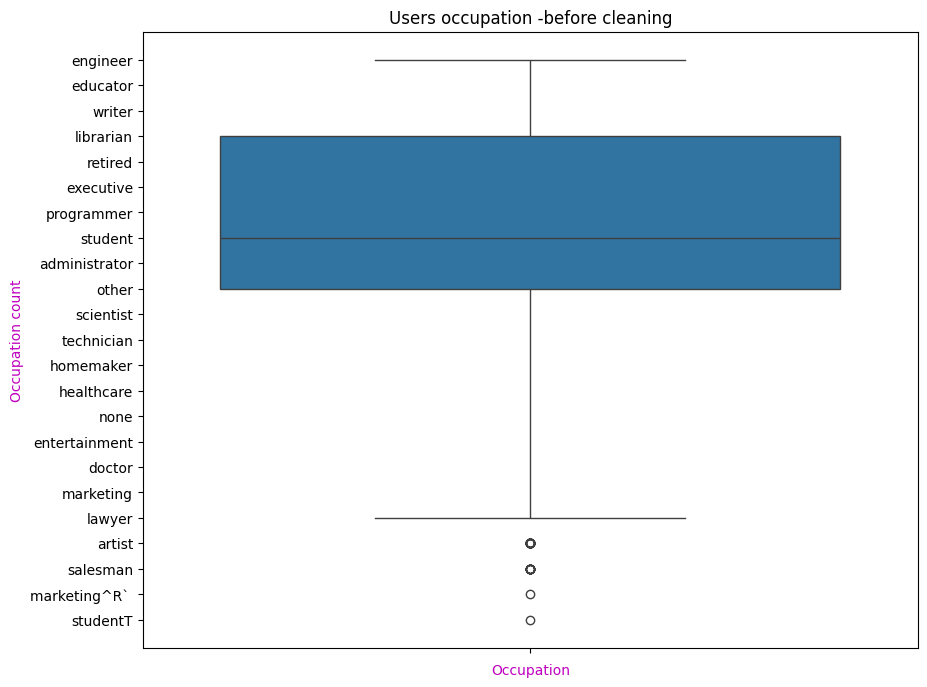

In [18]:
#Box plot to verify distribution
plt.figure(figsize=(10,8))
sns.boxplot(data=users, y='occupation')
plt.title('Users occupation -before cleaning')
plt.ylabel('Occupation count', color="m")
plt.xlabel('Occupation', color='m')
plt.show()

In [19]:
users['occupation'].unique()

array(['engineer', 'educator', 'writer', 'librarian', 'retired', nan,
       'executive', 'programmer', 'student', 'administrator', 'other',
       'scientist', 'technician', 'homemaker', 'healthcare', 'none',
       'entertainment', 'doctor', 'marketing', 'lawyer', 'artist',
       'salesman', 'marketing^R` ', 'studentT'], dtype=object)

**Data Cleaning**

> Proposed steps.  
 
- Standardize column names.
- Fill Missing data - median.  
- Clean occupation and gender column  
- Clean age variable.  
- Format zip codes  

**Standardizing the columns names to remove space**

In [20]:
df = users.rename(columns={'zip code': 'zip_code'})
df

,id,age,gender,occupation,zip_code
0,821,37.0,M,engineer,77845
1,212,49.0,NaN,educator,61401
2,504,40.0,F,writer,92115
3,275,38.0,NaN,engineer,92064
4,701,51.0,F,librarian,56321
...,...,...,...,...,...
1032,187,26.0,M,educator,16801
1033,518,49.0,F,NaN,99709
1034,735,150.0,F,healthcare,85719
1035,483,NaN,M,scientist,43212


In [21]:
df['gender'].value_counts(dropna=False)
df['occupation'].value_counts(dropna=False)


occupation
student          189
other            105
NaN               99
educator          93
administrator     81
engineer          69
programmer        62
librarian         51
writer            48
executive         32
scientist         32
artist            31
marketing         26
technician        22
entertainment     18
healthcare        17
retired           15
lawyer            12
salesman          12
none               8
doctor             7
homemaker          6
marketing^R`       1
studentT           1
Name: count, dtype: int64

**Cleaning the occupation column**

In [22]:
df['occupation'] = (df['occupation']
      .str.lower()
      .str.strip()
      .str.replace(r'[^a-z ]+', '', regex=True)  # this helps to keep only letters and spaces
)
df['occupation']

0         engineer
1         educator
2           writer
3         engineer
4        librarian
           ...    
1032      educator
1033           NaN
1034    healthcare
1035     scientist
1036     librarian
Name: occupation, Length: 1037, dtype: object

In [23]:
replacements = {
    'studentt': 'student',
    'marketingr': 'marketing',
    'none': np.nan,
    '': np.nan
}

df['occupation'] = df['occupation'].replace(replacements)
df['occupation']

0         engineer
1         educator
2           writer
3         engineer
4        librarian
           ...    
1032      educator
1033           NaN
1034    healthcare
1035     scientist
1036     librarian
Name: occupation, Length: 1037, dtype: object

**Cleaning gender column to a consistent format**

In [24]:
df['gender'] = df['gender'].str.strip().str.lower()

gender_map = {
    'm': 'M',
    'male': 'M',
    'f': 'F',
    'female': 'F'
}
df['gender'] = df['gender'].map(gender_map)
df['gender']

0         M
1       NaN
2         F
3       NaN
4         F
       ... 
1032      M
1033      F
1034      F
1035      M
1036      F
Name: gender, Length: 1037, dtype: object

**Cleaning the impossible age values**

In [25]:
df['age'].describe()
# we are going to mark impossible ages as NaN
df.loc[(df['age'] < 0) | (df['age'] > 120), 'age'] = np.nan


In [26]:
df.info()
df.isna().sum()
df['occupation'].value_counts(dropna=False)
df['gender'].value_counts(dropna=False)


<class 'pandas.core.frame.DataFrame'>
Index: 1037 entries, 0 to 1036
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1037 non-null   int64  
 1   age         885 non-null    float64
 2   gender      936 non-null    object 
 3   occupation  930 non-null    object 
 4   zip_code    1037 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 48.6+ KB


gender
M      669
F      267
NaN    101
Name: count, dtype: int64

**Plotting age distribution**

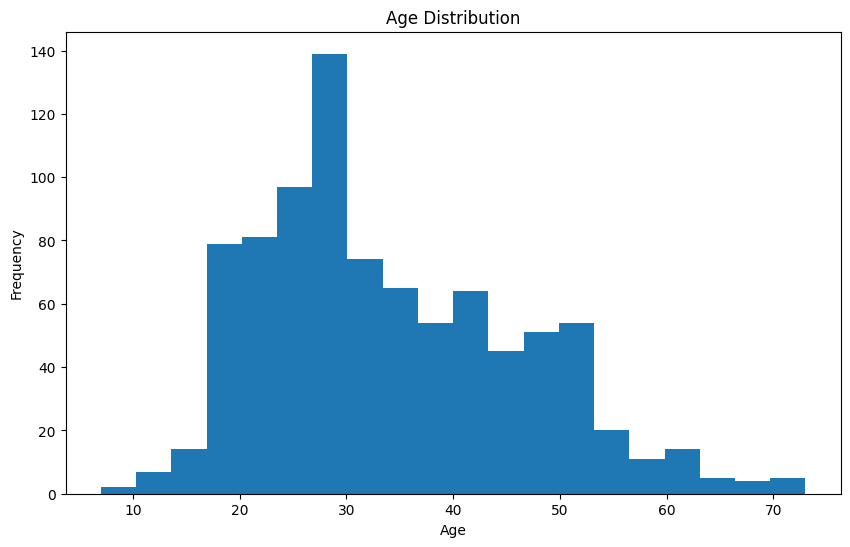

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


**Checking for potential age outliers**

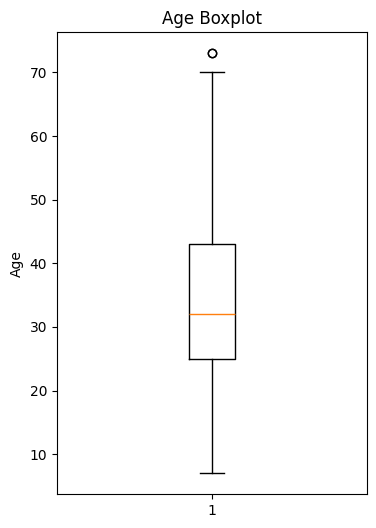

In [28]:
plt.figure(figsize=(4, 6))
plt.boxplot(df['age'].dropna())
plt.ylabel("Age")
plt.title("Age Boxplot")
plt.show()


**Visualizing gender distribution**

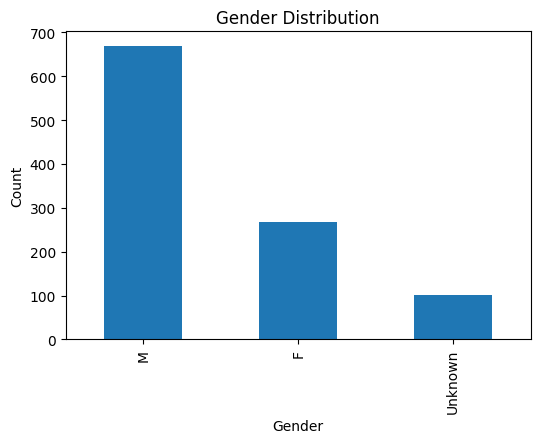

In [29]:
df['gender_plot'] = df['gender'].fillna('Unknown')

plt.figure(figsize=(6, 4))
df['gender_plot'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


**Plotting top 10 occupation distribution**

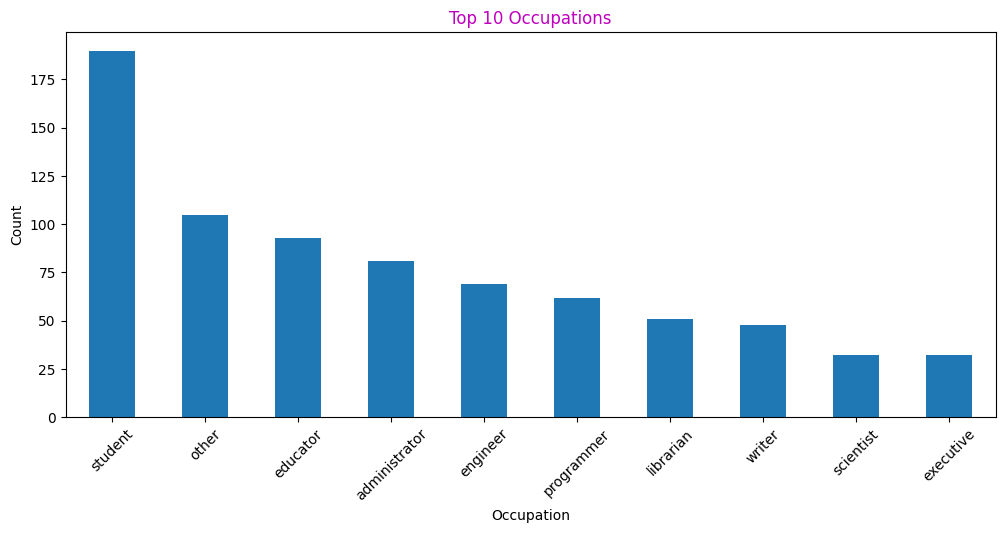

In [30]:
plt.figure(figsize=(12, 5))
df['occupation'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Top 10 Occupations', color='m')
plt.xticks(rotation=45)
plt.show()


**Checking the missing values as %**

In [31]:
missing_percentage = df.isna().mean().round(4) * 100
print("Missing Values (%)")
print(missing_percentage)


Missing Values (%)
id              0.00
age            14.66
gender          9.74
occupation     10.32
zip_code        0.00
gender_plot     0.00
dtype: float64


**Checking the relationships, age by gender**

<Figure size 1000x800 with 0 Axes>

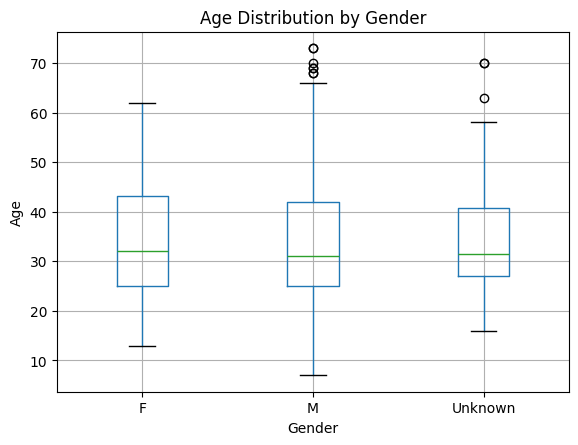

In [32]:
df_age_gender = df.dropna(subset=['age'])

plt.figure(figsize=(10, 8))
df_age_gender.boxplot(column='age', by='gender_plot')
plt.title('Age Distribution by Gender')
plt.suptitle("")  # removes default pandas title
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show();


**Checking the relationship, Age by Occupations**

In [33]:
age_by_occ = df.groupby('occupation')['age'].agg(['count', 'mean', 'median', 'min', 'max'])
print("Age Statistics by Occupation")
print(age_by_occ.sort_values(by='count', ascending=False).head(10))


Age Statistics by Occupation
               count       mean  median   min   max
occupation                                         
student          161  22.279503    22.0   7.0  40.0
other             95  33.831579    31.0  13.0  64.0
educator          74  41.459459    40.0  23.0  63.0
administrator     66  39.742424    38.5  22.0  70.0
engineer          56  37.214286    36.0  22.0  70.0
librarian         46  38.717391    36.0  23.0  69.0
programmer        46  32.543478    30.5  20.0  60.0
writer            39  38.435897    40.0  21.0  60.0
executive         30  39.033333    38.5  22.0  69.0
scientist         28  35.071429    35.5  23.0  55.0


**Gender vs occupation relationship**

In [34]:
gender_occ = pd.crosstab(df['occupation'], df['gender_plot'])
print("Gender vs Occupation (Counts)")
print(gender_occ.head(10))

print("\nGender vs Occupation (Proportions)")
print(gender_occ.div(gender_occ.sum(axis=1), axis=0).round(3).head(10))


Gender vs Occupation (Counts)
gender_plot     F   M  Unknown
occupation                    
administrator  32  39       10
artist         13  15        3
doctor          0   5        2
educator       22  64        7
engineer        1  53       15
entertainment   2  14        2
executive       3  27        2
healthcare     11   3        3
homemaker       4   1        1
lawyer          1   9        2

Gender vs Occupation (Proportions)
gender_plot        F      M  Unknown
occupation                          
administrator  0.395  0.481    0.123
artist         0.419  0.484    0.097
doctor         0.000  0.714    0.286
educator       0.237  0.688    0.075
engineer       0.014  0.768    0.217
entertainment  0.111  0.778    0.111
executive      0.094  0.844    0.062
healthcare     0.647  0.176    0.176
homemaker      0.667  0.167    0.167
lawyer         0.083  0.750    0.167


***DATA CLEANING STEPS***

**Handling missing values**

1. **Age**

In [35]:
df.fillna({'age': df['age'].median()}, inplace=True)

2. **Gender**

In [36]:
df['gender'] = df['gender'].fillna('Unknown')


3. **Occupation**

In [37]:
df['occupation'] = df['occupation'].fillna('Unknown')


In [38]:
print("Missing values after cleaning:")
print(df.isna().sum())

print("\nUpdated gender distribution:")
print(df['gender'].value_counts())

print("\nUpdated occupation distribution (top 10):")
print(df['occupation'].value_counts().head(10))

print("\nAge distribution:")
print(df['age'].value_counts())


Missing values after cleaning:
id             0
age            0
gender         0
occupation     0
zip_code       0
gender_plot    0
dtype: int64

Updated gender distribution:
gender
M          669
F          267
Unknown    101
Name: count, dtype: int64

Updated occupation distribution (top 10):
occupation
student          190
Unknown          107
other            105
educator          93
administrator     81
engineer          69
programmer        62
librarian         51
writer            48
scientist         32
Name: count, dtype: int64

Age distribution:
age
32.0    174
30.0     42
25.0     38
28.0     34
27.0     32
       ... 
62.0      1
10.0      1
11.0      1
66.0      1
7.0       1
Name: count, Length: 61, dtype: int64


**Investigating Clean Data For Final Analysis**

In [39]:
df_clean = df.copy()
print("\nFinal dataset info summary:")
print(df_clean.info())



Final dataset info summary:
<class 'pandas.core.frame.DataFrame'>
Index: 1037 entries, 0 to 1036
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1037 non-null   int64  
 1   age          1037 non-null   float64
 2   gender       1037 non-null   object 
 3   occupation   1037 non-null   object 
 4   zip_code     1037 non-null   object 
 5   gender_plot  1037 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 56.7+ KB
None


**Correlation Analysis for numerical variables**

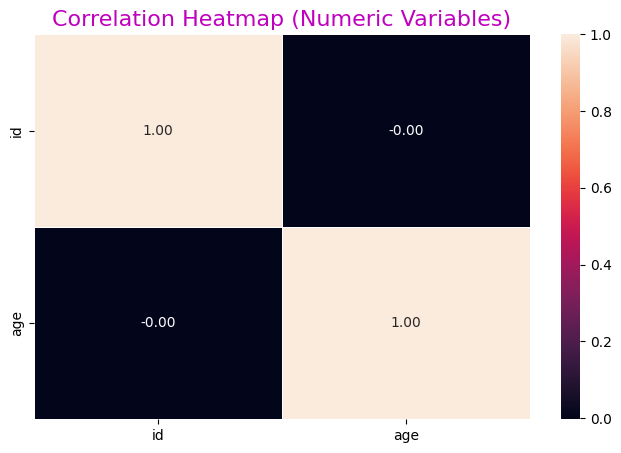

In [40]:
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables)", fontsize=16, color='m')
plt.show()


**Bivariate Analysis**

1. **Age vs Gender**

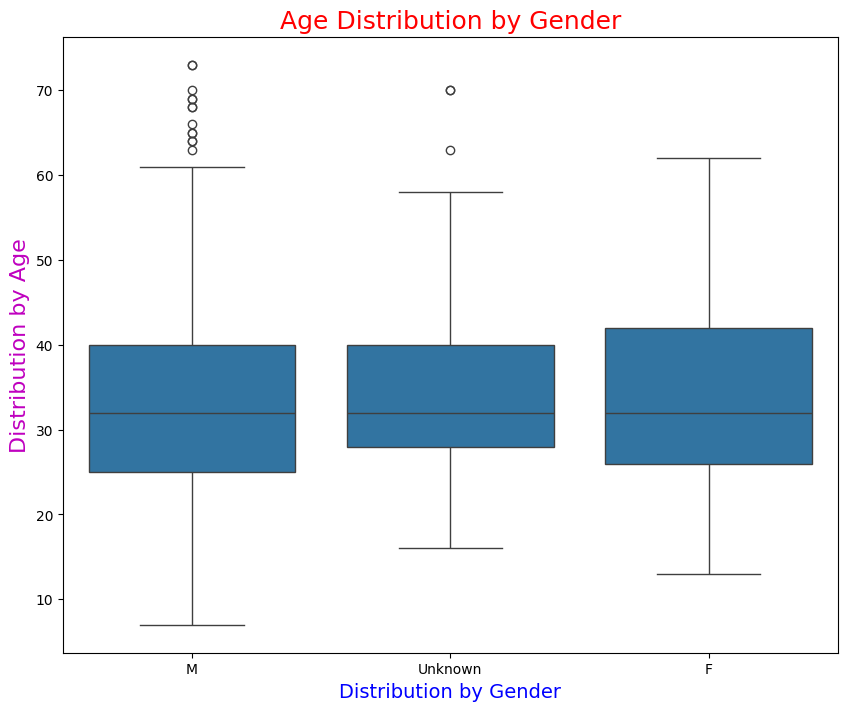

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(x='gender', y='age', data=df_clean)
plt.title("Age Distribution by Gender",loc= 'center',fontsize=18, color='r')
plt.xlabel("Distribution by Gender", color='b', fontsize=14)
plt.ylabel('Distribution by Age', color='m', fontsize=16)
plt.show();

2. **Age vs Occupation, top 5**

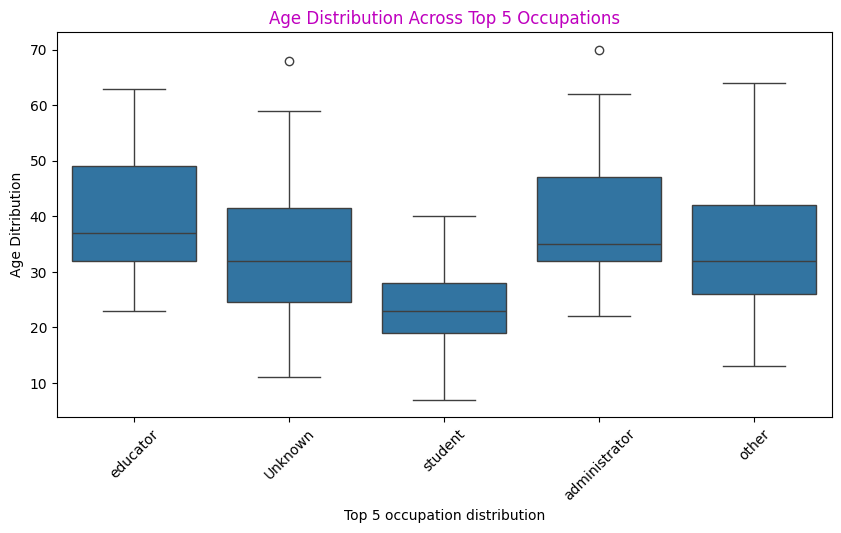

In [42]:
top5_occ = df_clean['occupation'].value_counts().index[:5]
df_top5_occ = df_clean[df_clean['occupation'].isin(top5_occ)]

plt.figure(figsize=(10,5))
sns.boxplot(x='occupation', y='age', data=df_top5_occ)
plt.xticks(rotation=45)
plt.title("Age Distribution Across Top 5 Occupations", color='m')
plt.ylabel("Age Ditribution")
plt.xlabel("Top 5 occupation distribution")
plt.show()


**The following insights can be deduced from the cleaned EDA**
1. No missing values remain in cleaned dataset.
2. Age is approximately normally distributed with potential slight right skew.
3. Strong representation imbalance in gender (M >> F >> Unknown).
5. No correlation between numeric variables from the check heatmap.


